[16  2  2]
[[0.33922864 0.64207986 0.7135154 ]
 [0.64207986 0.91893238 0.78554234]
 [0.7135154  0.78554234 0.56287382]]


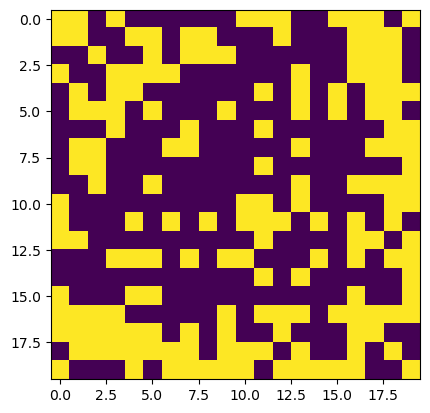

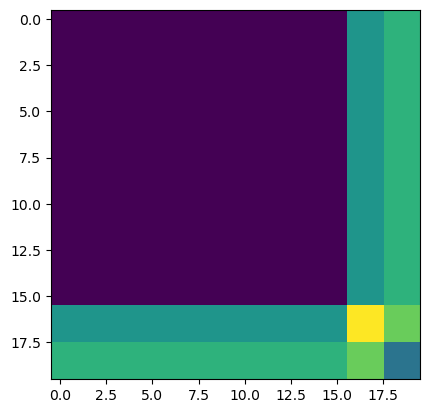

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def CRP(alpha, N):
    clusters = [[1]]
    for i in range(2, N + 1):
        p = np.random.uniform(0, 1)
        probs = np.array([len(cluster) / (i + alpha-1) for cluster in clusters])
        cluster_assignment = sum(np.cumsum(probs) < p)

        if cluster_assignment == len(clusters):
            clusters.append([i])
        else:
            clusters[cluster_assignment].append(i)

    return np.array([len(cluster) for cluster in clusters])

def Phi(clusters):
    n = len(clusters)
    phis = np.random.beta(1,1,(n,n))
    for i in range(n-1,-1,-1):
        for j in range(n):
            phis[i,j]=phis[j,i]
    
    return phis

def make_block_phis(phis, clusters):
    for i, ii in enumerate(clusters):
        for j, jj in enumerate(clusters):
            if j==0:
                A=np.full((ii,jj),phis[i,j])
            else:
                A=np.hstack((A,np.full((ii,jj),phis[i,j])))

        if i==0:
            block_phis=A
        else:
            block_phis=np.vstack((block_phis,A))
    
    return block_phis

def Adj_matrix(phis, clusters):
    n=sum(clusters)
    Adj_matrix=np.zeros((n,n))
    
    block_phis=make_block_phis(phis,clusters)
    
    for i in range(n):
        for j in range(n):
            p=np.random.rand()
            if p<block_phis[i,j]:
                Adj_matrix[i,j]=1
                Adj_matrix[j,i]=1
            else:
                Adj_matrix[i,j]=0
                Adj_matrix[j,i]=0
    
    return Adj_matrix

clusters=CRP(1,20)
phis=Phi(clusters)
Adj=Adj_matrix(phis,clusters)
print(clusters)
print(phis)
plt.imshow(Adj)
plt.figure()
plt.imshow(make_block_phis(phis,clusters))

In [61]:
np.random.rand()

0.8684087376413194

In [58]:
clusters=np.array([3,2,2,1])
phis=np.array([[4,0,0,0],
               [0,3,0,0],
               [0,0,2,0],
               [0,0,0,1]])

for i, ii in enumerate(clusters):
    for j, jj in enumerate(clusters):
        if j==0:
            A=np.full((ii,jj),phis[i,j])
        else:
            A=np.hstack((A,np.full((ii,jj),phis[i,j])))
        
        print(A.shape)
    
    if i==0:
        B=A
    else:
        B=np.vstack((B,A))
        

print(B)

(3, 3)
(3, 5)
(3, 7)
(3, 8)
(2, 3)
(2, 5)
(2, 7)
(2, 8)
(2, 3)
(2, 5)
(2, 7)
(2, 8)
(1, 3)
(1, 5)
(1, 7)
(1, 8)
[[4 4 4 0 0 0 0 0]
 [4 4 4 0 0 0 0 0]
 [4 4 4 0 0 0 0 0]
 [0 0 0 3 3 0 0 0]
 [0 0 0 3 3 0 0 0]
 [0 0 0 0 0 2 2 0]
 [0 0 0 0 0 2 2 0]
 [0 0 0 0 0 0 0 1]]


In [52]:
clusters

[10, 3, 6, 1]